### NLP Week 3: Soup

In [1]:
import nltk
from urllib.request import urlopen

In [2]:
url = ("https://www.linkedin.com/pulse/top-companies-2021-50-best-workplaces-grow-your-career-us-/?published=t?trk=eml-mktg-bcs-top-companies-2021-employee&src=e-eml&mcid=6783440793798537216")

In [3]:
bestWorkPlaces = urlopen(url).read()

In [4]:
bestWorkPlaces

b'<!DOCTYPE html><html lang="en"><head><meta name="pageKey" content="d_flagship2_pulse_read"><meta name="linkedin:pageTag" content="old=index;premium=index"><meta name="locale" content="en_US"><meta id="config"data-app-id=""data-custom-tracking-code=""data-tracking-page-type=""data-jet-tags=""data-multiproduct-name=""data-service-name=""data-app-version=""/><meta id="google-analytics-config"data-use-location-for-dp=""data-use-page-title=""/><link rel="canonical" href="https://www.linkedin.com/pulse/top-companies-2021-50-best-workplaces-grow-your-career-us-"><link rel="icon" href="https://static-exp1.licdn.com/sc/h/al2o9zrvru7aqj8e1x2rzsrca"><script>function getDfd() {let yFn,nFn;const p=new Promise((y, n)=>{yFn=y;nFn=n;});p.resolve=yFn;p.reject=nFn;return p;}window.lazyloader = getDfd();window.tracking = getDfd();window.impressionTracking = getDfd();window.pemTracking = getDfd();window.ingraphTracking = getDfd();window.appDetection = getDfd();</script><title>Top Companies 2021: The 50 

In [59]:
from bs4 import BeautifulSoup

In [60]:
url_text = BeautifulSoup(urlopen(url)).get_text()

In [61]:
url_text

"Top Companies 2021: The 50 best workplaces to grow your career in the U.S.\nJoin nowSign inBen Ingham for LinkedInTop Companies 2021: The 50 best workplaces to grow your career in the U.S.Published on April 28, 2021April 28, 2021\xa0•\xa016,225\xa0Likes\xa0•\xa0721 CommentsReport this postLinkedIn News5,574,760 followersLike16,225Comment721ShareLinkedInFacebookTwitter0The world of work is transforming. Not only have we worked through a once-in-a-generation global pandemic, but decades of automation, the rise of artificial intelligence and a new shift to remote work have all reshaped what our professional lives look like — and what we’re expecting from our employers.Today, we are launching our 2021 LinkedIn Top Companies list, our fifth-annual ranking of the 50 best workplaces to grow your career. After taking a hiatus from the list in 2020 as we all figured out the new world of work, we’re also debuting our new methodology, which uses unique LinkedIn data to go beyond the companies th

In [8]:
start = url_text.find("Top Companies 2021: The 50 best workplaces to grow your career in the U.S")

In [ ]:
end = url_text.find("Published ByLinkedIn News5,493,536")

In [ ]:
last_sent = len("Published ByLinkedIn News5,493,536")

In [ ]:
intro = url_text[start:end+last_sent]

#### Sentiment Analysis Intro

    1) + * + == + very good
    2) - * - == + not bad
    3) - * + == - not good
    

In [62]:
import numpy as np
import pandas as pd

In [63]:
neg_sample = "neg_sample.csv"
pos_sample = "positive_sample.csv"

# Reference for data: https://gist.github.com/mkulakowski2/4289437

In [64]:
neg_df = pd.read_csv(neg_sample)
neg_df.columns = ["negative"]
pos_df = pd.read_csv(pos_sample)
pos_df.columns = ["positive"]

In [65]:
neg_list = neg_df.values.tolist()
pos_list = pos_df.values.tolist()

In [66]:
neg_list[:10]

[['abnormal'],
 ['abolish'],
 ['abominable'],
 ['abominably'],
 ['abominate'],
 ['abomination'],
 ['abort'],
 ['aborted'],
 ['aborts'],
 ['abrade']]

In [15]:
pos_list[:10]

[['a+'],
 ['abound'],
 ['abounds'],
 ['abundance'],
 ['abundant'],
 ['accessable'],
 ['accessible'],
 ['acclaim'],
 ['acclaimed'],
 ['acclamation']]

In [13]:
def sentimentAnalysis(text):
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            for item in pos_list:
                if(word ==item[0]):
                    p_count +=1
            for item in neg_list:
                if(word ==item[0]):
                    n_count +=1
                    
        if p_count > 0 and n_count == 0:
            print("+ : " + sentence)
        elif n_count%2 > 0:
            print("-: " + sentence)
        elif n_count%2 == 0 and n_count > 0:
            print("+: " + sentence)
        else:
            print("?: " + sentence)
    

In [16]:
sentimentAnalysis("Love abounds, Happy Monday")

+ : Love abounds, Happy Monday


In [17]:
sentimentAnalysis("Tired")

?: Tired


# Named Entity Recognition

Entity Annotations
Doc.ents are token spans with their own set of annotations.


In [18]:
from IPython.display import Image


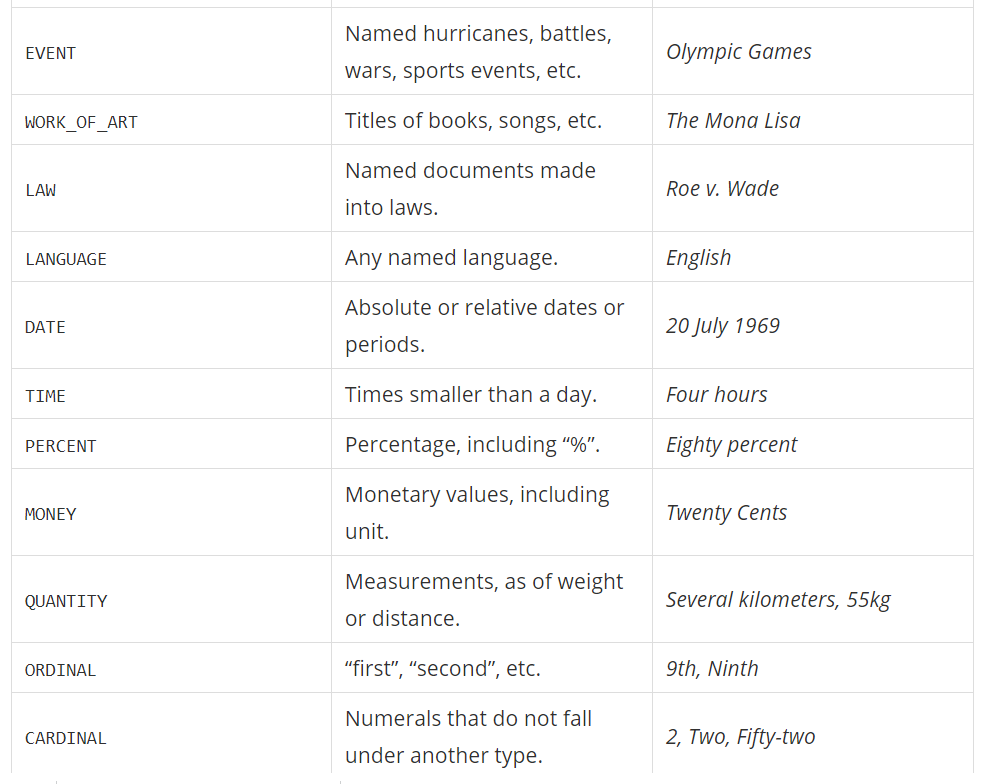

In [57]:
Image(filename='notebookImages/parts2.png')

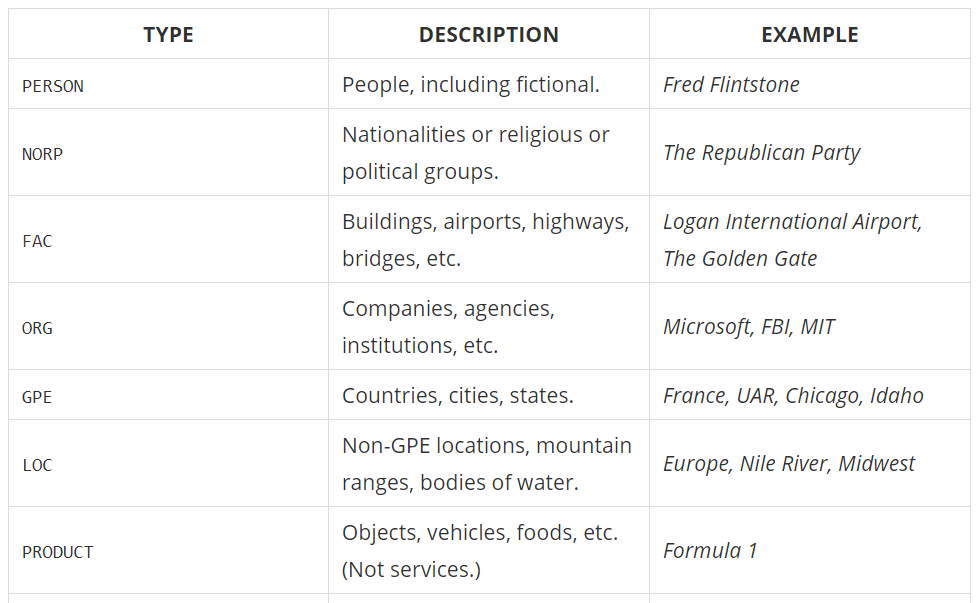

In [58]:
Image(filename='notebookImages/parts.png')

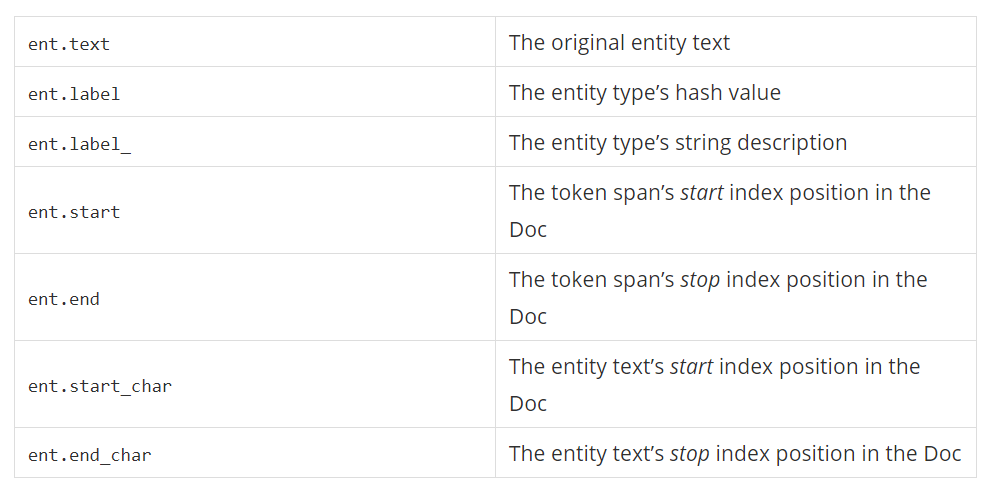

In [19]:
Image(filename='notebookImages/entitiesDoc.png')


In [67]:
import spacy

In [68]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
# !python -m spacy download en_core_web_sm 

In [69]:
def show_entity(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
    else:
        print("No entities found!")

In [70]:
doc = nlp("I love New York. New York has technology companies like Apple, Microsoft")

In [25]:
show_entity(doc)

New York - GPE - Countries, cities, states
New York - GPE - Countries, cities, states
Apple - ORG - Companies, agencies, institutions, etc.
Microsoft - ORG - Companies, agencies, institutions, etc.


In [ ]:
doc = nlp("Teach Toddlers Tech is an amazing book. Please grab a copy, Thank you!")

In [26]:
show_entity(doc)

New York - GPE - Countries, cities, states
New York - GPE - Countries, cities, states
Apple - ORG - Companies, agencies, institutions, etc.
Microsoft - ORG - Companies, agencies, institutions, etc.


In [71]:
# create custom tags with spacy
from spacy.tokens import Span

In [72]:
ORG = doc.vocab.strings[u"ORG"]

In [73]:
ORG

383

In [ ]:
# Adding a single named entity :-)
newEntity = Span(doc, 0, 1, label=ORG) #start index and ned
doc.ents = list(doc.ents) + [newEntity]

In [74]:
# Multiple named entity
from spacy.matcher import PhraseMatcher

In [75]:
doc = nlp("Teach Toddler Tech is a series and the subtitle of our first book is pair programming. We all know the importance of pair-programming")

In [76]:
show_entity(doc)

Teach Toddler Tech - ORG - Companies, agencies, institutions, etc.
first - ORDINAL - "first", "second", etc.


In [77]:
matcher = PhraseMatcher(nlp.vocab)

In [79]:
phraseList = ['pair programming', 'pair-programming']

In [80]:
phrasePattern = [nlp(text) for text in phraseList]

In [81]:
matcher.add("subTitle", None, *phrasePattern)

In [82]:
foundMatches = matcher(doc)

In [83]:
foundMatches

[(743624500533919614, 14, 16), (743624500533919614, 23, 26)]

In [84]:
bookSubTitle = doc.vocab.strings["WORK_OF_ART"]

In [85]:
newEntity = [Span(doc, match[1], match[2], label=bookSubTitle) for match in foundMatches]

In [86]:
doc.ents = list(doc.ents) + newEntity #Add our new entity

In [87]:
show_entity(doc)

Teach Toddler Tech - ORG - Companies, agencies, institutions, etc.
first - ORDINAL - "first", "second", etc.
pair programming - WORK_OF_ART - Titles of books, songs, etc.
pair-programming - WORK_OF_ART - Titles of books, songs, etc.


In [91]:
"""
Find the number of times an entity appears in a doc
"""
entity = [entity for entity in doc.ents if entity.label_ == 'ORG']

In [92]:
entity

[Teach Toddler Tech]

In [93]:
len(entity)

1

## Visualize NER

In [94]:
from spacy import displacy

In [95]:
doc = nlp("Over the last three weeks, we have sold over 50 copies of our Teach Toddlers Tech: pair programming book."
        u" You all are amazing!!! Please grab a copy")

In [96]:
displacy.render(doc, style='ent', jupyter=True)

In [97]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent',jupyter=True )
    

In [98]:
colors = {'ORG':'yellow'}
options = {'ents':['ORG'], 'colors':colors}

In [51]:
displacy.render(doc, style='ent', jupyter=True, options=options)

In [100]:
colors = {'ORG':'radial-gradient(pink, yellow)'} 
#can also use hex color code #4287f5 or linear-gradient(45deg, pink, yello)
options = {'ents':['ORG'], 'colors':colors}

In [101]:
displacy.render(doc, style='ent', jupyter=True, options=options)

In [ ]:
displacy.serve(doc, style='ent', options=options)


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [10/May/2021 10:24:31] "GET / HTTP/1.1" 200 903
127.0.0.1 - - [10/May/2021 10:24:31] "GET /favicon.ico HTTP/1.1" 200 903


In [ ]:
def sentiment(text):
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        sent_word = pd.DataFrame(sent_words)
        sent_word.columns = ["sent_words"]
        print(sent_word)
        for k in range(0, len(sent_word)):
            for index, word in sent_word.iterrows():
                for i in range(0, len(pos_df)):
                    for index, row in pos_df.iterrows():
#                         print(word[k] + " " + row[i])
                        if word[k] == row[k]:
                            p_count +=1
                    for index, row in neg_df.iterrows():
                        if word[k] == row[i]:
                            n_count +=1
        if p_count > 0 and n_count == 0:
            print("+ : " + sentence)
        elif n_count%2 > 0:
            print("-: " + sentence)
        elif n_count%2 == 0 and n_count > 0:
            print("+: " + sentence)
        else:
            print("?: " + sentence)